# Analysis of Loan Risk Profile

This project aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. 

This ensures that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this project.

In other words, I want to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. Hopefully, this information can be utilized for portfolio and risk assessment.

In [3]:
import numpy as np
import pandas as pd

app_data = pd.read_csv("application_data.csv", sep=",")
col_des = pd.read_csv("columns_description.csv", sep=",", encoding='Windows-1252')

In [4]:
app_data.isnull().mean()

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE            0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
FLAG_OWN_REALTY               0.000000
CNT_CHILDREN                  0.000000
AMT_INCOME_TOTAL              0.000000
AMT_CREDIT                    0.000000
AMT_ANNUITY                   0.000039
AMT_GOODS_PRICE               0.000904
NAME_TYPE_SUITE               0.004201
NAME_INCOME_TYPE              0.000000
NAME_EDUCATION_TYPE           0.000000
NAME_FAMILY_STATUS            0.000000
NAME_HOUSING_TYPE             0.000000
REGION_POPULATION_RELATIVE    0.000000
DAYS_BIRTH                    0.000000
DAYS_EMPLOYED                 0.000000
DAYS_REGISTRATION             0.000000
DAYS_ID_PUBLISH               0.000000
OWN_CAR_AGE                   0.659908
FLAG_MOBIL                    0.000000
FLAG_EMP_PHONE                0.000000
FLAG_WORK_PHONE               0.000000
FLAG_CONT_MOBILE         

Checking if a column exists with more than 50% missing values

In [5]:

app_data.columns[app_data.isnull().mean() > 0.5]

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE'],
      dtype='object')

Removing this data.

In [6]:

app_data = app_data.drop(columns = ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE'])

Adding a colun to check the loan amount other than that taken for consumer goods

In [7]:

app_data['Other_Loan'] = app_data.apply(lambda row: row.AMT_CREDIT - row.AMT_GOODS_PRICE, axis = 1)

Adding a column to check the tenure of amount payble

In [8]:

app_data['Tenure'] = app_data.apply(lambda row: row.AMT_CREDIT / (row.AMT_ANNUITY), axis = 1)

In [9]:
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,Other_Loan,Tenure
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,55597.5,16.461104
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,164002.5,36.234085
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,15682.5,10.532818
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.461618


Check all the unique values for the analysis from each column of the dataframe.

In [10]:

app_data_dict = app_data.drop(columns = ['SK_ID_CURR'])
app_data_dicts = dict(zip([i for i in app_data_dict.columns] , [pd.DataFrame(app_data_dict[i].unique(), columns=[i]) for i in app_data_dict.columns]))

In [11]:
app_data_dicts

{'TARGET':    TARGET
 0       1
 1       0, 'NAME_CONTRACT_TYPE':   NAME_CONTRACT_TYPE
 0         Cash loans
 1    Revolving loans, 'CODE_GENDER':   CODE_GENDER
 0           M
 1           F
 2         XNA, 'FLAG_OWN_CAR':   FLAG_OWN_CAR
 0            N
 1            Y, 'FLAG_OWN_REALTY':   FLAG_OWN_REALTY
 0               Y
 1               N, 'CNT_CHILDREN':     CNT_CHILDREN
 0              0
 1              1
 2              2
 3              3
 4              4
 5              7
 6              5
 7              6
 8              8
 9              9
 10            11
 11            12
 12            10
 13            19
 14            14, 'AMT_INCOME_TOTAL':       AMT_INCOME_TOTAL
 0           202500.000
 1           270000.000
 2            67500.000
 3           135000.000
 4           121500.000
 5            99000.000
 6           171000.000
 7           360000.000
 8           112500.000
 9            38419.155
 10          225000.000
 11          189000.000
 12          15750

Create a new df based on required values from app_data

In [12]:


app_required_data = app_data[['SK_ID_CURR',
'TARGET',
'NAME_CONTRACT_TYPE',
'AMT_INCOME_TOTAL',
'AMT_CREDIT',
'AMT_ANNUITY',
'AMT_GOODS_PRICE',
'Other_Loan',
'Tenure',
'FLAG_MOBIL',
'FLAG_EMP_PHONE',
'FLAG_WORK_PHONE',
'FLAG_CONT_MOBILE',
'FLAG_EMAIL',
'REG_REGION_NOT_LIVE_REGION',
'REG_REGION_NOT_WORK_REGION',
'FLAG_DOCUMENT_2',
'FLAG_DOCUMENT_3',
'FLAG_DOCUMENT_4',
'FLAG_DOCUMENT_5',
'FLAG_DOCUMENT_6',
'FLAG_DOCUMENT_7',
'FLAG_DOCUMENT_8',
'FLAG_DOCUMENT_9',
'FLAG_DOCUMENT_10',
'FLAG_DOCUMENT_11',
'FLAG_DOCUMENT_12',
'FLAG_DOCUMENT_13',
'FLAG_DOCUMENT_14',
'FLAG_DOCUMENT_15',
'FLAG_DOCUMENT_16',
'FLAG_DOCUMENT_17',
'FLAG_DOCUMENT_18',
'FLAG_DOCUMENT_19',
'FLAG_DOCUMENT_20',
'FLAG_DOCUMENT_21']]

In [13]:
app_required_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,Other_Loan,Tenure,FLAG_MOBIL,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,202500.0,406597.5,24700.5,351000.0,55597.5,16.461104,1,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,270000.0,1293502.5,35698.5,1129500.0,164002.5,36.234085,1,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,67500.0,135000.0,6750.0,135000.0,0.0,20.000000,1,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,135000.0,312682.5,29686.5,297000.0,15682.5,10.532818,1,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,121500.0,513000.0,21865.5,513000.0,0.0,23.461618,1,...,0,0,0,0,0,0,0,0,0,0


In [14]:
required_data = app_required_data.copy()

In [15]:
required_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,Other_Loan,Tenure,FLAG_MOBIL,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,202500.0,406597.5,24700.5,351000.0,55597.5,16.461104,1,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,270000.0,1293502.5,35698.5,1129500.0,164002.5,36.234085,1,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,67500.0,135000.0,6750.0,135000.0,0.0,20.000000,1,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,135000.0,312682.5,29686.5,297000.0,15682.5,10.532818,1,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,121500.0,513000.0,21865.5,513000.0,0.0,23.461618,1,...,0,0,0,0,0,0,0,0,0,0


In [16]:
required_data['Target_points'] = required_data.apply(lambda row: row.TARGET*(-50) , axis = 1)

def func_contract(x):
    if x == 'Revolving loans':
        return 5
    else : 
        return 10
required_data['Contract_points'] = required_data['NAME_CONTRACT_TYPE'].apply(func_contract)

def func_income(required_data):
    if (required_data['AMT_CREDIT'] < required_data['AMT_INCOME_TOTAL']):
        return 10
    else :
        return 0
required_data['Income_loan_points'] = required_data.apply(func_income,axis = 1)

def func_othloan(required_data):
    if (required_data['Other_Loan']/required_data['AMT_ANNUITY'] == 0 ):
        return 10
    elif (required_data['Other_Loan']/required_data['AMT_ANNUITY'] > 0 and required_data['Other_Loan']/required_data['AMT_ANNUITY'] <= 5):
        return 5
    else :
        return 0
required_data['Other_loan_points'] = required_data.apply(func_othloan,axis = 1)   

def func_tenure(x):
    if (x < 3):
        return 20
    elif (x>=3 and x<5) : 
        return 15
    elif (x>=5 and x<10) :
        return 10
    elif (x>=10 and x<15) :
        return 5
    else :
        return 0
required_data['Tenure_points'] = required_data['Tenure'].apply(func_tenure)

required_data['emp_phone_points'] = required_data.apply(lambda row: row.FLAG_EMP_PHONE*(2) , axis = 1)

required_data['work_phone_points'] = required_data.apply(lambda row: row.FLAG_WORK_PHONE*(1) , axis = 1)

required_data['Mobile_reachable_points'] = required_data.apply(lambda row: row.FLAG_CONT_MOBILE*(5) , axis = 1)

required_data['Email_points'] = required_data.apply(lambda row: row.FLAG_EMAIL*(2) , axis = 1)

required_data['Registered_region_points'] = required_data.apply(lambda row: row.REG_REGION_NOT_LIVE_REGION*(2) , axis = 1)

required_data['Work_region_points'] = required_data.apply(lambda row: row.REG_REGION_NOT_WORK_REGION*(2) , axis = 1)

required_data['doc2_points'] = required_data.apply(lambda row: row.FLAG_DOCUMENT_2*(10) , axis = 1)

required_data['doc3_points'] = required_data.apply(lambda row: row.FLAG_DOCUMENT_3*(9.5) , axis = 1)

required_data['doc4_points'] = required_data.apply(lambda row: row.FLAG_DOCUMENT_4*(9) , axis = 1)

required_data['doc5_points'] = required_data.apply(lambda row: row.FLAG_DOCUMENT_5*(8.5) , axis = 1)

required_data['doc6_points'] = required_data.apply(lambda row: row.FLAG_DOCUMENT_6*(8) , axis = 1)

required_data['doc7_points'] = required_data.apply(lambda row: row.FLAG_DOCUMENT_7*(7.5) , axis = 1)

required_data['doc8_points'] = required_data.apply(lambda row: row.FLAG_DOCUMENT_8*(7) , axis = 1)

required_data['doc9_points'] = required_data.apply(lambda row: row.FLAG_DOCUMENT_9*(6.5) , axis = 1)

required_data['doc10_points'] = required_data.apply(lambda row: row.FLAG_DOCUMENT_10*(6) , axis = 1)

required_data['doc11_points'] = required_data.apply(lambda row: row.FLAG_DOCUMENT_11*(5.5) , axis = 1)

required_data['doc12_points'] = required_data.apply(lambda row: row.FLAG_DOCUMENT_12*(5) , axis = 1)

required_data['doc13_points'] = required_data.apply(lambda row: row.FLAG_DOCUMENT_13*(4.5) , axis = 1)

required_data['doc14_points'] = required_data.apply(lambda row: row.FLAG_DOCUMENT_14*(4) , axis = 1)

required_data['doc15_points'] = required_data.apply(lambda row: row.FLAG_DOCUMENT_15*(3.5) , axis = 1)

required_data['doc16_points'] = required_data.apply(lambda row: row.FLAG_DOCUMENT_16*(3) , axis = 1)

required_data['doc17_points'] = required_data.apply(lambda row: row.FLAG_DOCUMENT_17*(2.5) , axis = 1)

required_data['doc18_points'] = required_data.apply(lambda row: row.FLAG_DOCUMENT_18*(2) , axis = 1)

required_data['doc19_points'] = required_data.apply(lambda row: row.FLAG_DOCUMENT_19*(1.5) , axis = 1)

required_data['doc20_points'] = required_data.apply(lambda row: row.FLAG_DOCUMENT_20*(1) , axis = 1)

required_data['doc21_points'] = required_data.apply(lambda row: row.FLAG_DOCUMENT_21*(0.5) , axis = 1)

In [17]:
required_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,Other_Loan,Tenure,FLAG_MOBIL,...,doc12_points,doc13_points,doc14_points,doc15_points,doc16_points,doc17_points,doc18_points,doc19_points,doc20_points,doc21_points
0,100002,1,Cash loans,202500.0,406597.5,24700.5,351000.0,55597.5,16.461104,1,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
1,100003,0,Cash loans,270000.0,1293502.5,35698.5,1129500.0,164002.5,36.234085,1,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2,100004,0,Revolving loans,67500.0,135000.0,6750.0,135000.0,0.0,20.000000,1,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
3,100006,0,Cash loans,135000.0,312682.5,29686.5,297000.0,15682.5,10.532818,1,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
4,100007,0,Cash loans,121500.0,513000.0,21865.5,513000.0,0.0,23.461618,1,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


Keeping only the points related data

In [18]:

required_data = required_data.drop(columns = ['TARGET',
'NAME_CONTRACT_TYPE',
'AMT_INCOME_TOTAL',
'AMT_CREDIT',
'AMT_ANNUITY',
'AMT_GOODS_PRICE',
'Other_Loan',
'Tenure',
'FLAG_MOBIL',
'FLAG_EMP_PHONE',
'FLAG_WORK_PHONE',
'FLAG_CONT_MOBILE',
'FLAG_EMAIL',
'REG_REGION_NOT_LIVE_REGION',
'REG_REGION_NOT_WORK_REGION',
'FLAG_DOCUMENT_2',
'FLAG_DOCUMENT_3',
'FLAG_DOCUMENT_4',
'FLAG_DOCUMENT_5',
'FLAG_DOCUMENT_6',
'FLAG_DOCUMENT_7',
'FLAG_DOCUMENT_8',
'FLAG_DOCUMENT_9',
'FLAG_DOCUMENT_10',
'FLAG_DOCUMENT_11',
'FLAG_DOCUMENT_12',
'FLAG_DOCUMENT_13',
'FLAG_DOCUMENT_14',
'FLAG_DOCUMENT_15',
'FLAG_DOCUMENT_16',
'FLAG_DOCUMENT_17',
'FLAG_DOCUMENT_18',
'FLAG_DOCUMENT_19',
'FLAG_DOCUMENT_20',
'FLAG_DOCUMENT_21'])

In [19]:
required_data.head()

,SK_ID_CURR,Target_points,Contract_points,Income_loan_points,Other_loan_points,Tenure_points,emp_phone_points,work_phone_points,Mobile_reachable_points,Email_points,...,doc12_points,doc13_points,doc14_points,doc15_points,doc16_points,doc17_points,doc18_points,doc19_points,doc20_points,doc21_points
0,100002,-50,10,0,5,0,2,0,5,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
1,100003,0,10,0,5,0,2,0,5,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
2,100004,0,5,0,10,0,2,1,5,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
3,100006,0,10,0,5,5,2,0,5,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
4,100007,0,10,0,10,0,2,0,5,0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


In [20]:
col_list= list(required_data)
col_list.remove('SK_ID_CURR')
col_list

['Target_points',
 'Contract_points',
 'Income_loan_points',
 'Other_loan_points',
 'Tenure_points',
 'emp_phone_points',
 'work_phone_points',
 'Mobile_reachable_points',
 'Email_points',
 'Registered_region_points',
 'Work_region_points',
 'doc2_points',
 'doc3_points',
 'doc4_points',
 'doc5_points',
 'doc6_points',
 'doc7_points',
 'doc8_points',
 'doc9_points',
 'doc10_points',
 'doc11_points',
 'doc12_points',
 'doc13_points',
 'doc14_points',
 'doc15_points',
 'doc16_points',
 'doc17_points',
 'doc18_points',
 'doc19_points',
 'doc20_points',
 'doc21_points']

Finding the sum of all the points calculated

In [21]:

required_data['Total_points'] = required_data[col_list].sum(axis=1)

In [22]:
required_data

,SK_ID_CURR,Target_points,Contract_points,Income_loan_points,Other_loan_points,Tenure_points,emp_phone_points,work_phone_points,Mobile_reachable_points,Email_points,...,doc13_points,doc14_points,doc15_points,doc16_points,doc17_points,doc18_points,doc19_points,doc20_points,doc21_points,Total_points
0,100002,-50,10,0,5,0,2,0,5,0,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,-18.5
1,100003,0,10,0,5,0,2,0,5,0,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,31.5
2,100004,0,5,0,10,0,2,1,5,0,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,23.0
3,100006,0,10,0,5,5,2,0,5,0,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,36.5
4,100007,0,10,0,10,0,2,0,5,0,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,34.0
5,100008,0,10,0,5,0,2,1,5,0,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,32.5
6,100009,0,10,0,5,0,2,0,5,0,...,0.0,4,0.0,0,0.0,0,0.0,0,0.0,33.0
7,100010,0,10,0,10,0,2,1,5,0,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,37.5
8,100011,0,10,0,5,0,0,0,5,0,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,29.5
9,100012,0,5,0,10,0,2,0,5,0,...,0.0,0,0.0,0,0.0,0,0.0,0,0.0,22.0


In [23]:
required_data['Total_points'].describe()

count    307511.000000
mean         28.820728
std          15.033053
min         -38.000000
25%          26.500000
50%          31.500000
75%          36.500000
max          63.500000
Name: Total_points, dtype: float64

Maximum atainable score for the given conditions is 157
in this case, the mean for all the loan transaction points comes to about 29 points.

We can set the bar at 29 points.

Customers with a total score of less than say 11 shall not be given any type of loan.

Customers with a total score in the range of 11-35 shall be given a loan but with higher interest rate.

Customers with a score of 36 and above shall be given the loan without any hessitation.

Let's see the distribution of these customers:

In [24]:


no_loan_count = required_data['Total_points'].map(lambda x: x <= 11).sum()
loan_highInt_count = required_data['Total_points'].map(lambda x: 11< x <= 35).sum()
loan_noCond_count = required_data['Total_points'].map(lambda x: x > 35).sum()

In [25]:
no_loan_count

24861

In [26]:
loan_highInt_count

182533

In [27]:
loan_noCond_count

100117

In [45]:
data = [no_loan_count , loan_highInt_count, loan_noCond_count]
label = ['Do not approve Loan', 'Approve Loan with high interest rate', 'Approve loan with no condition']

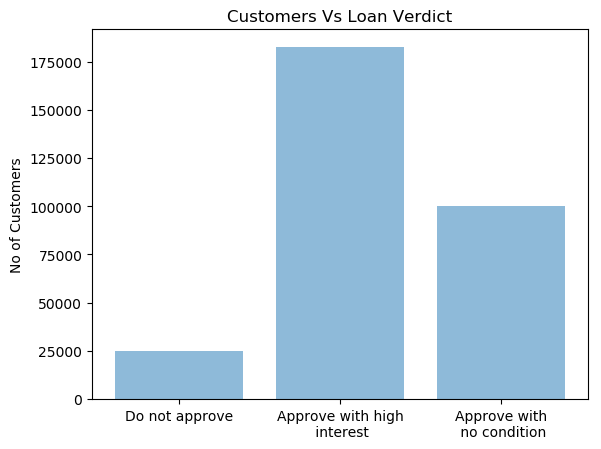

In [59]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Do not approve', 'Approve with high\n interest', 'Approve with\n no condition')
y_pos = np.arange(len(objects))
data = [no_loan_count , loan_highInt_count, loan_noCond_count]

plt.bar(y_pos, data, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('No of Customers')
plt.title('Customers Vs Loan Verdict')

plt.show()

# Next Step

In [60]:
import numpy as np
import pandas as pd

app_data = pd.read_csv("application_data.csv", sep=",")
prev_app = pd.read_csv("previous_application.csv", sep=",")
col_des = pd.read_csv("columns_description.csv", sep=",", encoding='Windows-1252')

Getting a summary of missing values.

In [61]:


prev_app.count()

SK_ID_PREV                     1670214
SK_ID_CURR                     1670214
NAME_CONTRACT_TYPE             1670214
AMT_ANNUITY                    1297979
AMT_APPLICATION                1670214
AMT_CREDIT                     1670213
AMT_DOWN_PAYMENT                774370
AMT_GOODS_PRICE                1284699
WEEKDAY_APPR_PROCESS_START     1670214
HOUR_APPR_PROCESS_START        1670214
FLAG_LAST_APPL_PER_CONTRACT    1670214
NFLAG_LAST_APPL_IN_DAY         1670214
RATE_DOWN_PAYMENT               774370
RATE_INTEREST_PRIMARY             5951
RATE_INTEREST_PRIVILEGED          5951
NAME_CASH_LOAN_PURPOSE         1670214
NAME_CONTRACT_STATUS           1670214
DAYS_DECISION                  1670214
NAME_PAYMENT_TYPE              1670214
CODE_REJECT_REASON             1670214
NAME_TYPE_SUITE                 849809
NAME_CLIENT_TYPE               1670214
NAME_GOODS_CATEGORY            1670214
NAME_PORTFOLIO                 1670214
NAME_PRODUCT_TYPE              1670214
CHANNEL_TYPE             

Removing values that have more than 45% missing values.

In [62]:

prev_app = prev_app.drop(columns = ["AMT_ANNUITY",'AMT_DOWN_PAYMENT','AMT_GOODS_PRICE',
                         'RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED','NAME_TYPE_SUITE','CNT_PAYMENT',
                                    'DAYS_FIRST_DRAWING','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION',
                                    'DAYS_LAST_DUE','DAYS_TERMINATION','NFLAG_INSURED_ON_APPROVAL'])

prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,...,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,17145.0,17145.0,SATURDAY,15,Y,1,XAP,...,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle,POS mobile with interest
1,2802425,108129,Cash loans,607500.0,679671.0,THURSDAY,11,Y,1,XNA,...,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,112500.0,136444.5,TUESDAY,11,Y,1,XNA,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high,Cash X-Sell: high
3,2819243,176158,Cash loans,450000.0,470790.0,MONDAY,7,Y,1,XNA,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,337500.0,404055.0,THURSDAY,9,Y,1,Repairs,...,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high


In [63]:
prev_app['NAME_CONTRACT_TYPE'].describe()

count        1670214
unique             4
top       Cash loans
freq          747553
Name: NAME_CONTRACT_TYPE, dtype: object

Removing columns that not relevant to the analysis based on logical reasoning

In [64]:


prev_app = prev_app.drop(columns = ['SK_ID_PREV','SK_ID_CURR','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT',
                                    'NFLAG_LAST_APPL_IN_DAY'])

prev_app.head()

,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,Consumer loans,17145.0,17145.0,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle,POS mobile with interest
1,Cash loans,607500.0,679671.0,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action,Cash X-Sell: low
2,Cash loans,112500.0,136444.5,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high,Cash X-Sell: high
3,Cash loans,450000.0,470790.0,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle,Cash X-Sell: middle
4,Cash loans,337500.0,404055.0,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high


In [65]:
prev_app.pivot_table(index = ['NAME_CONTRACT_TYPE'])

,AMT_APPLICATION,AMT_CREDIT,DAYS_DECISION,SELLERPLACE_AREA
NAME_CONTRACT_TYPE,,,,
Cash loans,274760.431648,304061.487936,-571.815839,12.712530
Consumer loans,93787.825036,91524.593300,-1249.566307,664.736596
Revolving loans,97816.236334,173505.596310,-684.364499,156.100935
XNA,0.000000,0.000000,-415.488439,45.731214


In [66]:
prev_app.groupby('NAME_CONTRACT_TYPE').count()

,AMT_APPLICATION,AMT_CREDIT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
NAME_CONTRACT_TYPE,,,,,,,,,,,,,,,,
Cash loans,747553,747553,747553,747553,747553,747553,747553,747553,747553,747553,747553,747553,747553,747553,747553,747553
Consumer loans,729151,729151,729151,729151,729151,729151,729151,729151,729151,729151,729151,729151,729151,729151,729151,729151
Revolving loans,193164,193163,193164,193164,193164,193164,193164,193164,193164,193164,193164,193164,193164,193164,193164,193164
XNA,346,346,346,346,346,346,346,346,346,346,346,346,346,346,346,0


Removing rows with XNA values

In [67]:


prev_app = prev_app.drop(prev_app[prev_app['NAME_CONTRACT_TYPE'] == 'XNA'].index)

prev_app.groupby('NAME_CONTRACT_TYPE').count()

,AMT_APPLICATION,AMT_CREDIT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
NAME_CONTRACT_TYPE,,,,,,,,,,,,,,,,
Cash loans,747553,747553,747553,747553,747553,747553,747553,747553,747553,747553,747553,747553,747553,747553,747553,747553
Consumer loans,729151,729151,729151,729151,729151,729151,729151,729151,729151,729151,729151,729151,729151,729151,729151,729151
Revolving loans,193164,193163,193164,193164,193164,193164,193164,193164,193164,193164,193164,193164,193164,193164,193164,193164


Checking the app_data dataset to see if there is consistency in NAME_CONTRACT_TYPE columns

In [68]:


app_data.groupby('NAME_CONTRACT_TYPE').count()

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
NAME_CONTRACT_TYPE,,,,,,,,,,,,,,,,,,,,,
Cash loans,278232,278232,278232,278232,278232,278232,278232,278232,278220,278232,...,278232,278232,278232,278232,240993,240993,240993,240993,240993,240993
Revolving loans,29279,29279,29279,29279,29279,29279,29279,29279,29279,29001,...,29279,29279,29279,29279,24999,24999,24999,24999,24999,24999


Since the app_data dataset only has Cash loans and Revolving loans, the Consumer loans data in 
prev_app dataset is no longer relevant. Removing Consumer loans entries.

In [69]:


prev_app = prev_app.drop(prev_app[prev_app['NAME_CONTRACT_TYPE'] == 'Consumer loans'].index)

prev_app.groupby('NAME_CONTRACT_TYPE').count()

,AMT_APPLICATION,AMT_CREDIT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
NAME_CONTRACT_TYPE,,,,,,,,,,,,,,,,
Cash loans,747553,747553,747553,747553,747553,747553,747553,747553,747553,747553,747553,747553,747553,747553,747553,747553
Revolving loans,193164,193163,193164,193164,193164,193164,193164,193164,193164,193164,193164,193164,193164,193164,193164,193164


On further analysis, the Company should only be concerned about whether loan was approved or refused. 

Other scenarios will not help the company determine which client is safe to apporve loan or not.

In [70]:


prev_app = prev_app.drop(prev_app[prev_app['NAME_CONTRACT_STATUS'] == 'Canceled'].index)
prev_app = prev_app.drop(prev_app[prev_app['NAME_CONTRACT_STATUS'] == 'Unused offer'].index)

prev_app.pivot_table(index = ['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS'])

AMT_APPLICATION     AMT_CREDIT  \
NAME_CONTRACT_TYPE NAME_CONTRACT_STATUS                                   
Cash loans         Approved                380710.431234  420933.666044   
                   Refused                 478671.826388  532039.125704   
Revolving loans    Approved                108946.164567  227767.060448   
                   Refused                 164246.544975  224819.851011   

                                         DAYS_DECISION  SELLERPLACE_AREA  
NAME_CONTRACT_TYPE NAME_CONTRACT_STATUS                                   
Cash loans         Approved                -866.133720         19.049341  
                   Refused                 -563.844601         21.626519  
Revolving loans    Approved                -895.305438        232.125344  
                   Refused                 -660.462531        149.943372

Splitting the cash and revolving loans.

And, summarizing the cash loans to get an overview of the data.

In [71]:


prev_app_cash = prev_app.drop(prev_app[prev_app['NAME_CONTRACT_TYPE'] == 'Revolving loans'].index)
prev_app_rev = prev_app.drop(prev_app[prev_app['NAME_CONTRACT_TYPE'] == 'Cash loans'].index)

In [72]:


prev_app_cash.pivot_table(index = ['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS'])


AMT_APPLICATION     AMT_CREDIT  \
NAME_CONTRACT_TYPE NAME_CONTRACT_STATUS                                   
Cash loans         Approved                380710.431234  420933.666044   
                   Refused                 478671.826388  532039.125704   

                                         DAYS_DECISION  SELLERPLACE_AREA  
NAME_CONTRACT_TYPE NAME_CONTRACT_STATUS                                   
Cash loans         Approved                -866.133720         19.049341  
                   Refused                 -563.844601         21.626519

Summarizing the revolving loans to get an overview of the data.

In [73]:


prev_app_rev.pivot_table(index = ['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS'])

AMT_APPLICATION     AMT_CREDIT  \
NAME_CONTRACT_TYPE NAME_CONTRACT_STATUS                                   
Revolving loans    Approved                108946.164567  227767.060448   
                   Refused                 164246.544975  224819.851011   

                                         DAYS_DECISION  SELLERPLACE_AREA  
NAME_CONTRACT_TYPE NAME_CONTRACT_STATUS                                   
Revolving loans    Approved                -895.305438        232.125344  
                   Refused                 -660.462531        149.943372

Checking to see if cash loans dataset has any zero loan amount rows.

Since, the min = 0 value, it can be concluded that the revolving loans dataset has zero values for loan amounts.

In [74]:


prev_app_cash['AMT_APPLICATION'].describe()

count    4.784680e+05
mean     4.146825e+05
std      4.151739e+05
min      0.000000e+00
25%      1.350000e+05
50%      2.700000e+05
75%      5.400000e+05
max      4.050000e+06
Name: AMT_APPLICATION, dtype: float64

Removing those rows in cash loans data where the loan amount was zero.

In [75]:


prev_app_cash = prev_app.drop(prev_app[prev_app['AMT_APPLICATION'] == 0].index)

Checking to see if rows in cash loans dataset with zero loan amount have indeed been removed.

Since, min =/ 0, it can be concluded that the zero entries have been removed.

In [76]:


prev_app_cash['AMT_APPLICATION'].describe()

count    5.395420e+05
mean     4.025634e+05
std      3.978014e+05
min      2.011500e+04
25%      1.350000e+05
50%      2.475000e+05
75%      4.995000e+05
max      4.050000e+06
Name: AMT_APPLICATION, dtype: float64

Checking to see if revolving loans dataset has any zero loan amount rows.

Since, the min = 0 value, it can be concluded that the revolving loans dataset has zero values for loan amounts.

In [77]:


prev_app_rev['AMT_APPLICATION'].describe()

count    1.473050e+05
mean     1.275419e+05
std      1.961855e+05
min      0.000000e+00
25%      0.000000e+00
50%      4.500000e+04
75%      1.800000e+05
max      2.250000e+06
Name: AMT_APPLICATION, dtype: float64

Removing those rows in revolving loans data where the loan amount was zero.

In [78]:


prev_app_rev = prev_app.drop(prev_app[prev_app['AMT_APPLICATION'] == 0].index)

Checking to see if rows with zero loan amount have indeed been removed.

Since, min =/ 0, it can be concluded that the zero entries have been removed.

In [79]:


prev_app_rev['AMT_APPLICATION'].describe()

count    5.395420e+05
mean     4.025634e+05
std      3.978014e+05
min      2.011500e+04
25%      1.350000e+05
50%      2.475000e+05
75%      4.995000e+05
max      4.050000e+06
Name: AMT_APPLICATION, dtype: float64

Removing cancelled and unused loan offers as they don't tell us anything relevant to the analysis.

In [80]:


prev_app_cash = prev_app.drop(prev_app[prev_app['NAME_CONTRACT_STATUS'] == 'Canceled'].index)
prev_app_cash = prev_app.drop(prev_app[prev_app['NAME_CONTRACT_STATUS'] == 'Unused offer'].index)
prev_app_rev = prev_app.drop(prev_app[prev_app['NAME_CONTRACT_STATUS'] == 'Canceled'].index)
prev_app_rev = prev_app.drop(prev_app[prev_app['NAME_CONTRACT_STATUS'] == 'Unused offer'].index)

Again, summarizing the cash loans to get an overview of the data.

In [81]:


prev_app_cash.pivot_table(index = ['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS'])

AMT_APPLICATION     AMT_CREDIT  \
NAME_CONTRACT_TYPE NAME_CONTRACT_STATUS                                   
Cash loans         Approved                380710.431234  420933.666044   
                   Refused                 478671.826388  532039.125704   
Revolving loans    Approved                108946.164567  227767.060448   
                   Refused                 164246.544975  224819.851011   

                                         DAYS_DECISION  SELLERPLACE_AREA  
NAME_CONTRACT_TYPE NAME_CONTRACT_STATUS                                   
Cash loans         Approved                -866.133720         19.049341  
                   Refused                 -563.844601         21.626519  
Revolving loans    Approved                -895.305438        232.125344  
                   Refused                 -660.462531        149.943372

Again, summarizing the revolving loans to get an overview of the data.

In [82]:


prev_app_rev.pivot_table(index = ['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS'])

AMT_APPLICATION     AMT_CREDIT  \
NAME_CONTRACT_TYPE NAME_CONTRACT_STATUS                                   
Cash loans         Approved                380710.431234  420933.666044   
                   Refused                 478671.826388  532039.125704   
Revolving loans    Approved                108946.164567  227767.060448   
                   Refused                 164246.544975  224819.851011   

                                         DAYS_DECISION  SELLERPLACE_AREA  
NAME_CONTRACT_TYPE NAME_CONTRACT_STATUS                                   
Cash loans         Approved                -866.133720         19.049341  
                   Refused                 -563.844601         21.626519  
Revolving loans    Approved                -895.305438        232.125344  
                   Refused                 -660.462531        149.943372

It would make sense to categorize each of these continuous numerical variables and then do a correlation with the other variables
(['NAME_CONTRACT_TYPE','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY',
'NAME_PORTFOLIO','NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION']).

Categorizing for both cash and revolving loans.

In [83]:

pd.options.display.float_format = "{:.2f}".format
prev_app_cash[['AMT_APPLICATION','AMT_CREDIT','DAYS_DECISION','SELLERPLACE_AREA']].describe()

,AMT_APPLICATION,AMT_CREDIT,DAYS_DECISION,SELLERPLACE_AREA
count,625773.00,625772.00,625773.00,625773.00
mean,347090.50,404690.22,-774.26,63.38
std,394580.68,419028.07,655.75,640.04
min,0.00,0.00,-2922.00,-1.00
25%,85500.00,127350.00,-993.00,-1.00
50%,225000.00,254700.00,-577.00,-1.00
75%,450000.00,533160.00,-306.00,0.00
max,4050000.00,4104351.00,-2.00,250000.00


In [84]:
pd.options.display.float_format = "{:.2f}".format
prev_app_rev[['AMT_APPLICATION','AMT_CREDIT','DAYS_DECISION','SELLERPLACE_AREA']].describe()

,AMT_APPLICATION,AMT_CREDIT,DAYS_DECISION,SELLERPLACE_AREA
count,625773.00,625772.00,625773.00,625773.00
mean,347090.50,404690.22,-774.26,63.38
std,394580.68,419028.07,655.75,640.04
min,0.00,0.00,-2922.00,-1.00
25%,85500.00,127350.00,-993.00,-1.00
50%,225000.00,254700.00,-577.00,-1.00
75%,450000.00,533160.00,-306.00,0.00
max,4050000.00,4104351.00,-2.00,250000.00


Creating categories for Amt Application, Amt Credit and Days Decision. 

And, replacing columns with categorized columns.

Seller Place Area is skewed towards -1. 

In [85]:


# Cash loans

bins_amt_application_prev_app_cash = [20115,135000,247500,499500,4050000]
bins_amt_credit_prev_app_cash = [0,143910,275373,582768,4104351]
bins_amt_days_decision_prev_app_cash = [-2922, -932, -559, -303, -2]

prev_app_cash['BINS_AMT_APPLICATION'] = pd.cut(prev_app_cash['AMT_APPLICATION'], bins=bins_amt_application_prev_app_cash, labels = ["A1", "A2", "A3", "A4"])
prev_app_cash['BINS_AMT_CREDIT'] = pd.cut(prev_app_cash['AMT_CREDIT'], bins=bins_amt_credit_prev_app_cash, labels = ["B1", "B2", "B3", "B4"])
prev_app_cash['BINS_DAYS_DECISION'] = pd.cut(prev_app_cash['DAYS_DECISION'], bins=bins_amt_days_decision_prev_app_cash, labels = ["C1", "C2", "C3", "C4"])

# Revoving loans

bins_amt_application_prev_app_rev = [20115,135000,247500,499500,4050000]
bins_amt_credit_prev_app_rev = [0,143910,275373,582768,4104351]
bins_amt_days_decision_prev_app_rev = [-2922, -932, -559, -303, -2]

prev_app_rev['BINS_AMT_APPLICATION'] = pd.cut(prev_app_rev['AMT_APPLICATION'], bins=bins_amt_application_prev_app_rev, labels = ["A1", "A2", "A3", "A4"])
prev_app_rev['BINS_AMT_CREDIT'] = pd.cut(prev_app_rev['AMT_CREDIT'], bins=bins_amt_credit_prev_app_rev, labels = ["B1", "B2", "B3", "B4"])
prev_app_rev['BINS_DAYS_DECISION'] = pd.cut(prev_app_rev['DAYS_DECISION'], bins=bins_amt_days_decision_prev_app_rev, labels = ["C1", "C2", "C3", "C4"])

In [86]:
prev_app_cash.head()

,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION,BINS_AMT_APPLICATION,BINS_AMT_CREDIT,BINS_DAYS_DECISION
1,Cash loans,607500.00,679671.00,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action,Cash X-Sell: low,A4,B4,C4
2,Cash loans,112500.00,136444.50,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high,Cash X-Sell: high,A1,B1,C4
3,Cash loans,450000.00,470790.00,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle,Cash X-Sell: middle,A3,B3,C3
4,Cash loans,337500.00,404055.00,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high,A3,B3,C2
5,Cash loans,315000.00,340573.50,Everyday expenses,Approved,-684,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal,Cash X-Sell: low,A3,B3,C2


Saving the approved cash loans, refused cash loans, approved revolving loans and refused revolving loans as a new dataset.


In [87]:

new_prev_app_cash_approved = prev_app_cash[['NAME_CONTRACT_STATUS','NAME_CASH_LOAN_PURPOSE','NAME_CLIENT_TYPE','BINS_AMT_APPLICATION','BINS_AMT_CREDIT','BINS_DAYS_DECISION','CODE_REJECT_REASON']]
new_prev_app_cash_approved = new_prev_app_cash_approved.drop(prev_app_cash[prev_app_cash['NAME_CONTRACT_STATUS'] == 'Refused'].index)


new_prev_app_cash_refused = prev_app_cash[['NAME_CONTRACT_STATUS','NAME_CASH_LOAN_PURPOSE','NAME_CLIENT_TYPE','BINS_AMT_APPLICATION','BINS_AMT_CREDIT','BINS_DAYS_DECISION','CODE_REJECT_REASON']]
new_prev_app_cash_refused = new_prev_app_cash_refused.drop(prev_app_cash[prev_app_cash['NAME_CONTRACT_STATUS'] == 'Approved'].index)


new_prev_app_rev_approved = prev_app_rev[['NAME_CONTRACT_STATUS','NAME_CASH_LOAN_PURPOSE','NAME_CLIENT_TYPE','BINS_AMT_APPLICATION','BINS_AMT_CREDIT','BINS_DAYS_DECISION','CODE_REJECT_REASON']]
new_prev_app_rev_approved = new_prev_app_rev_approved.drop(prev_app_rev[prev_app_rev['NAME_CONTRACT_STATUS'] == 'Refused'].index)


new_prev_app_rev_refused = prev_app_rev[['NAME_CONTRACT_STATUS','NAME_CASH_LOAN_PURPOSE','NAME_CLIENT_TYPE','BINS_AMT_APPLICATION','BINS_AMT_CREDIT','BINS_DAYS_DECISION','CODE_REJECT_REASON']]
new_prev_app_rev_refused = new_prev_app_rev_refused.drop(prev_app_rev[prev_app_rev['NAME_CONTRACT_STATUS'] == 'Approved'].index)

Approved cash loans - AMT APPLICATION

Tells us about the distribution of Amount Application categories of cash loans that were approved

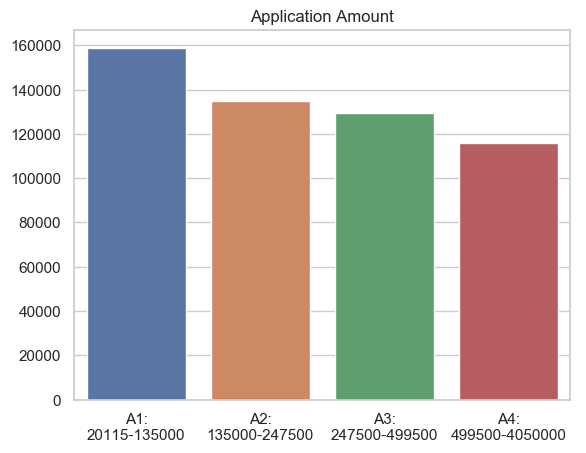

In [90]:


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

x = ['A1:\n20115-135000','A2:\n135000-247500','A3:\n247500-499500','A4:\n499500-4050000']
y = [158979,134882,129647,116033]

#plt.figure(figsize=(50,15))
plt.title('Application Amount')
sns.set(style="whitegrid")
bplot=sns.barplot(x,y)

plt.show()

Approved cash loans - AMT CREDIT

Tells us about the distribution of Amount Credit categories of cash loans that were approved

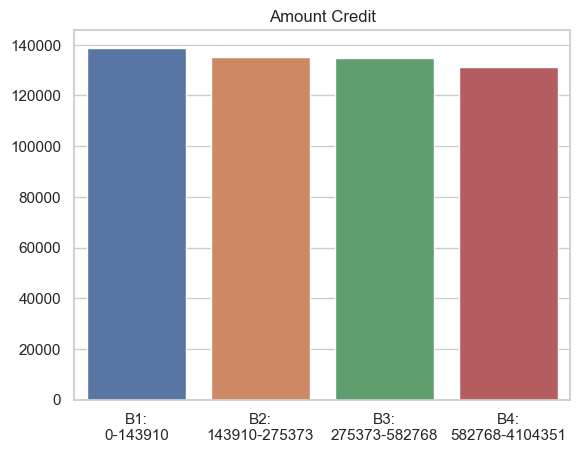

In [92]:


x = ['B1:\n0-143910','B2:\n143910-275373','B3:\n275373-582768','B4:\n582768-4104351']
y = [138877,135024,134594,131046]

#plt.figure(figsize=(50,15))
plt.title('Amount Credit')
sns.set(style="whitegrid")
bplot=sns.barplot(x,y)

plt.show()

Approved cash loans - DAYS_DECISION

Tells us about the distribution of days decision categories of cash loans that were approved

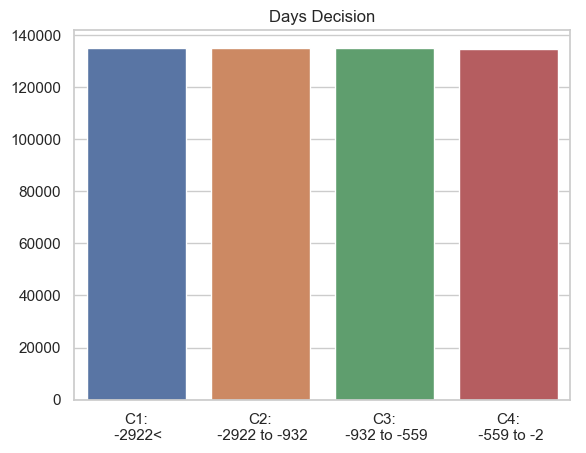

In [94]:


x = ['C1:\n -2922<','C2:\n -2922 to -932','C3:\n -932 to -559','C4:\n -559 to -2']
y = [135212,134895,134873,134551]

#plt.figure(figsize=(50,15))
plt.title('Days Decision')
sns.set(style="whitegrid")
bplot=sns.barplot(x,y)

plt.show()

Approved cash loans - NAME_CASH_LOAN_PURPOSE

Tells us about the distribution of the different loan purposes of cash loans that were approved

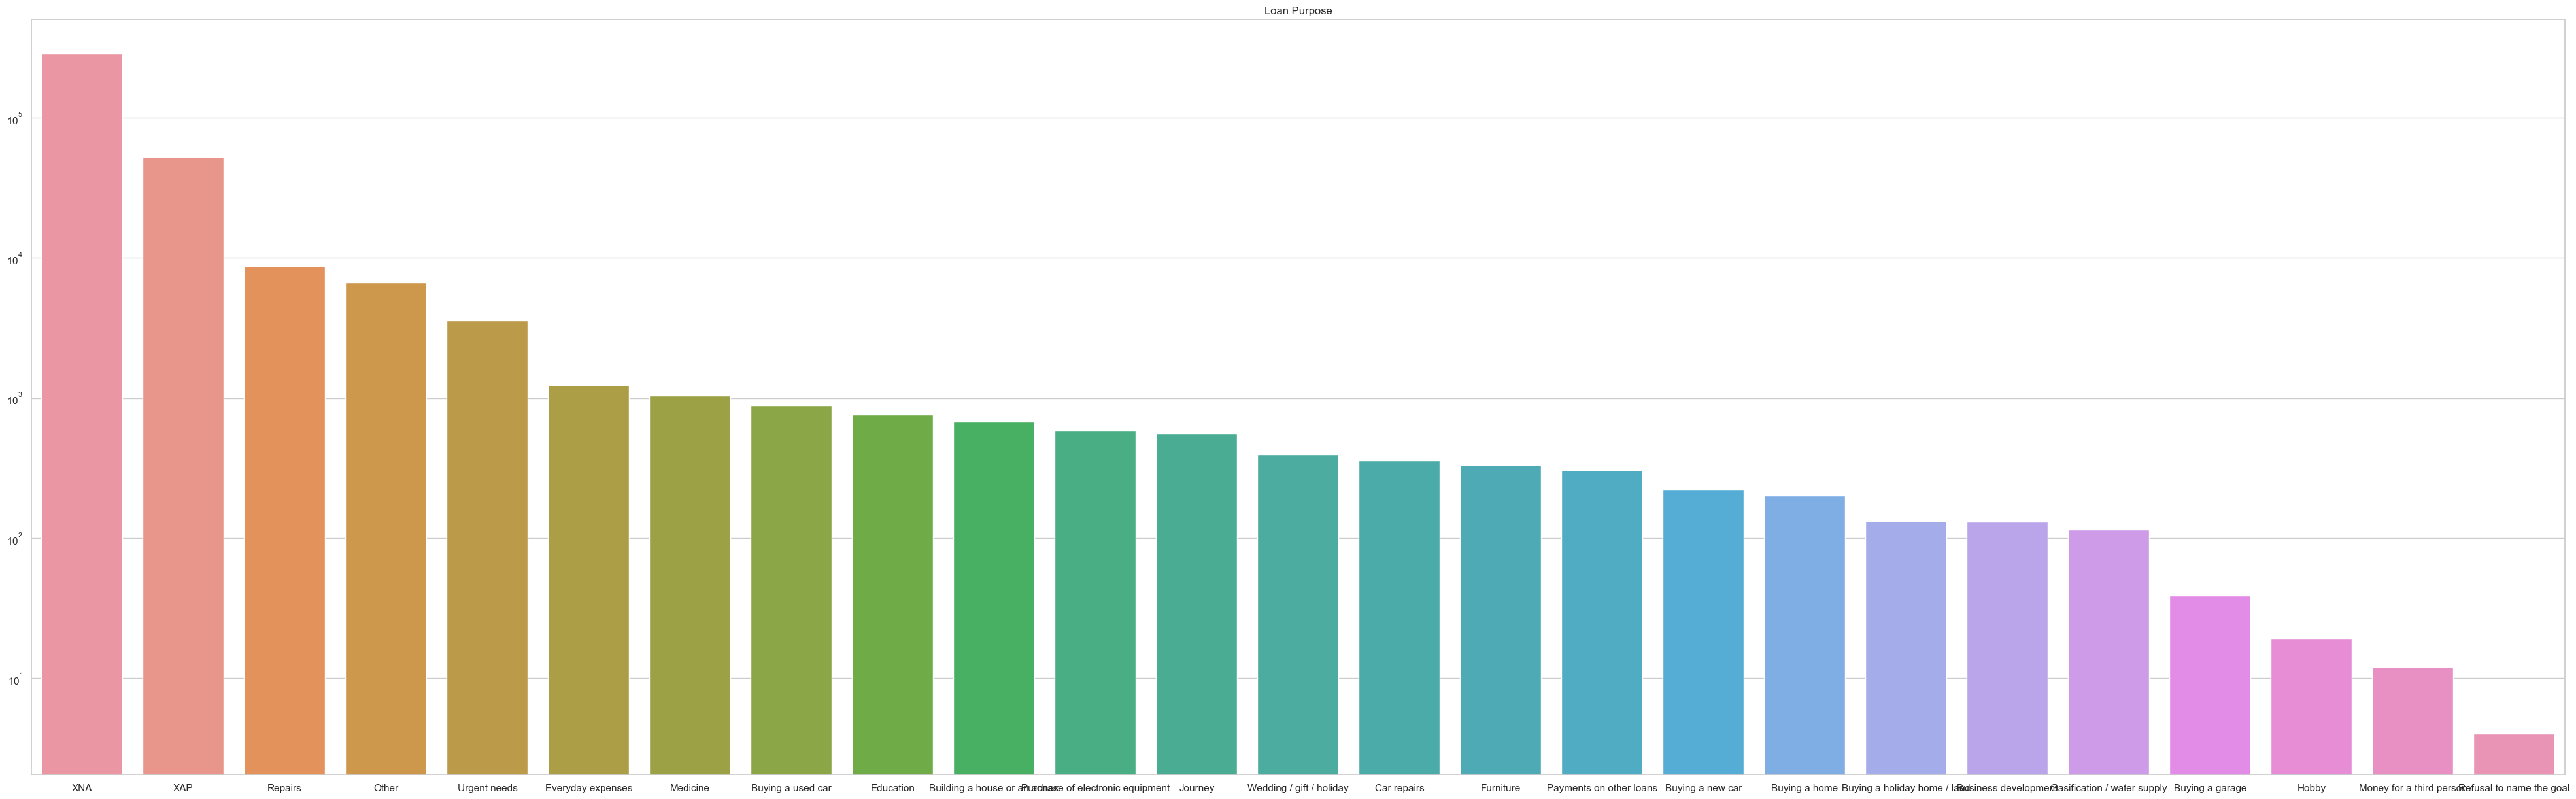

In [96]:


x = ["XNA","XAP","Repairs","Other","Urgent needs","Everyday expenses","Medicine","Buying a used car","Education","Building a house or an annex","Purchase of electronic equipment","Journey","Wedding / gift / holiday","Car repairs","Furniture","Payments on other loans","Buying a new car","Buying a home","Buying a holiday home / land","Business development","Gasification / water supply","Buying a garage","Hobby","Money for a third person","Refusal to name the goal"]
y = [285607,52467,8677,6677,3574,1236,1037,881,765,675,588,559,397,358,333,304,221,200,132,130,115,39,19,12,4]

plt.figure(figsize=(50,15))
plt.title('Loan Purpose')
plt.yscale('log')
sns.set(style="whitegrid")
bplot=sns.barplot(x,y)

plt.show()

Approved rev loans - AMT APPLICATION

Tells us about the distribution of Amount Application categories of revolving loans that were approved

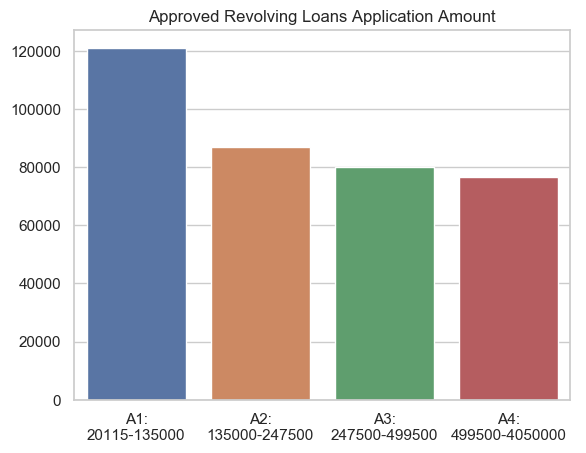

In [97]:


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

x = ['A1:\n20115-135000','A2:\n135000-247500','A3:\n247500-499500','A4:\n499500-4050000']
y = [121171,86957,80182,76696]

#plt.figure(figsize=(50,15))
plt.title('Approved Revolving Loans Application Amount')
sns.set(style="whitegrid")
bplot=sns.barplot(x,y)

plt.show()

Refused rev loans - AMT APPLICATION

Tells us about the distribution of Amount Application categories of revolving loans that were refused

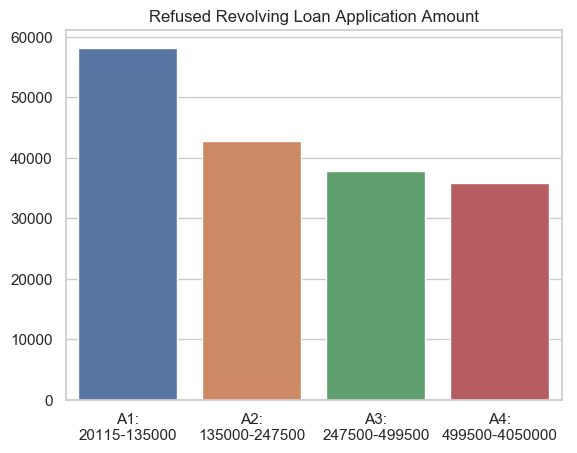

In [98]:


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

x = ['A1:\n20115-135000','A2:\n135000-247500','A3:\n247500-499500','A4:\n499500-4050000']
y = [58186,42690,37808,35851]

#plt.figure(figsize=(50,15))
plt.title('Refused Revolving Loan Application Amount')
sns.set(style="whitegrid")
bplot=sns.barplot(x,y)

plt.show()

Approved rev loans - AMT CREDIT

Tells us about the distribution of Amount Credit categories of revolving loans that were approved

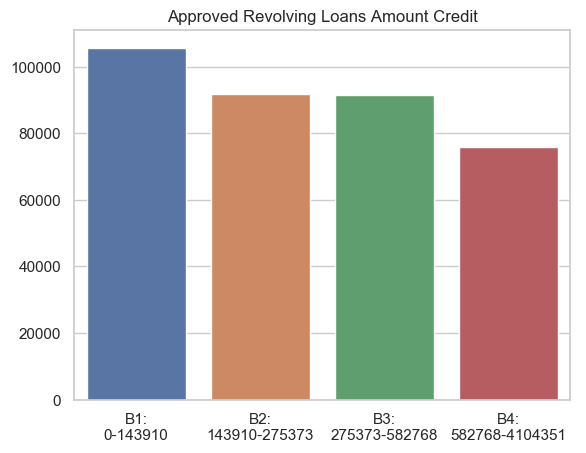

In [99]:


x = ['B1:\n0-143910','B2:\n143910-275373','B3:\n275373-582768','B4:\n582768-4104351']
y = [ 105758,91903,91459,75887]

#plt.figure(figsize=(50,15))
plt.title('Approved Revolving Loans Amount Credit')
sns.set(style="whitegrid")
bplot=sns.barplot(x,y)

plt.show()

Refused rev loans - AMT CREDIT

Tells us about the distribution of Amount Credit categories of revolving loans that were refused

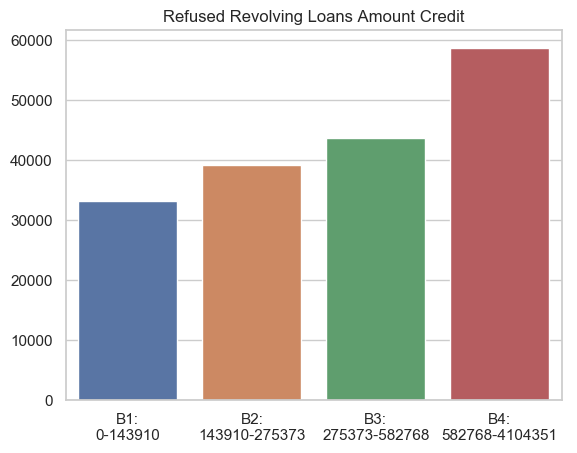

In [100]:


x = ['B1:\n0-143910','B2:\n143910-275373','B3:\n275373-582768','B4:\n582768-4104351']
y = [33119,39143,43565,58707]

#plt.figure(figsize=(50,15))
plt.title('Refused Revolving Loans Amount Credit')
sns.set(style="whitegrid")
bplot=sns.barplot(x,y)

plt.show()

Approved rev loans - DAYS DECISION

Tells us about the distribution of Days Decision categories of revolving loans that were approved

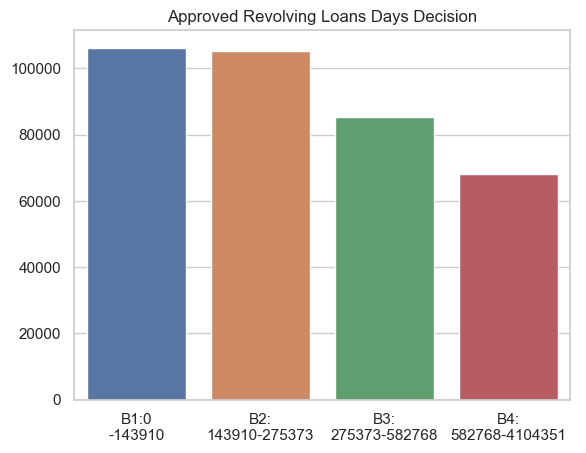

In [101]:


x = ['B1:0\n-143910','B2:\n143910-275373','B3:\n275373-582768','B4:\n582768-4104351']
y = [106258,105149,85366,68224]

#plt.figure(figsize=(50,15))
plt.title('Approved Revolving Loans Days Decision')
sns.set(style="whitegrid")
bplot=sns.barplot(x,y)

plt.show()

Refused rev loans - DAYS DECISION

Tells us about the distribution of Days Decision categories of revolving loans that were refused

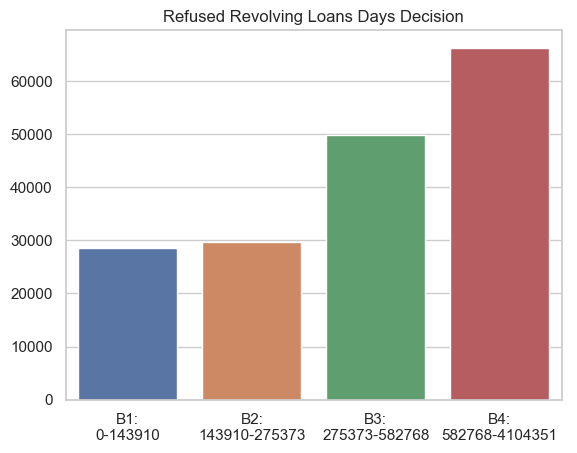

In [102]:


x = ['B1:\n0-143910','B2:\n143910-275373','B3:\n275373-582768','B4:\n582768-4104351']
y = [28637,29724,49846,66327]

#plt.figure(figsize=(50,15))
plt.title('Refused Revolving Loans Days Decision')
sns.set(style="whitegrid")
bplot=sns.barplot(x,y)

plt.show()

Approved rev loans - NAME_CASH_LOAN_PURPOSE

Tells us about the distribution of loan purpose categories of revolving loans that were approved

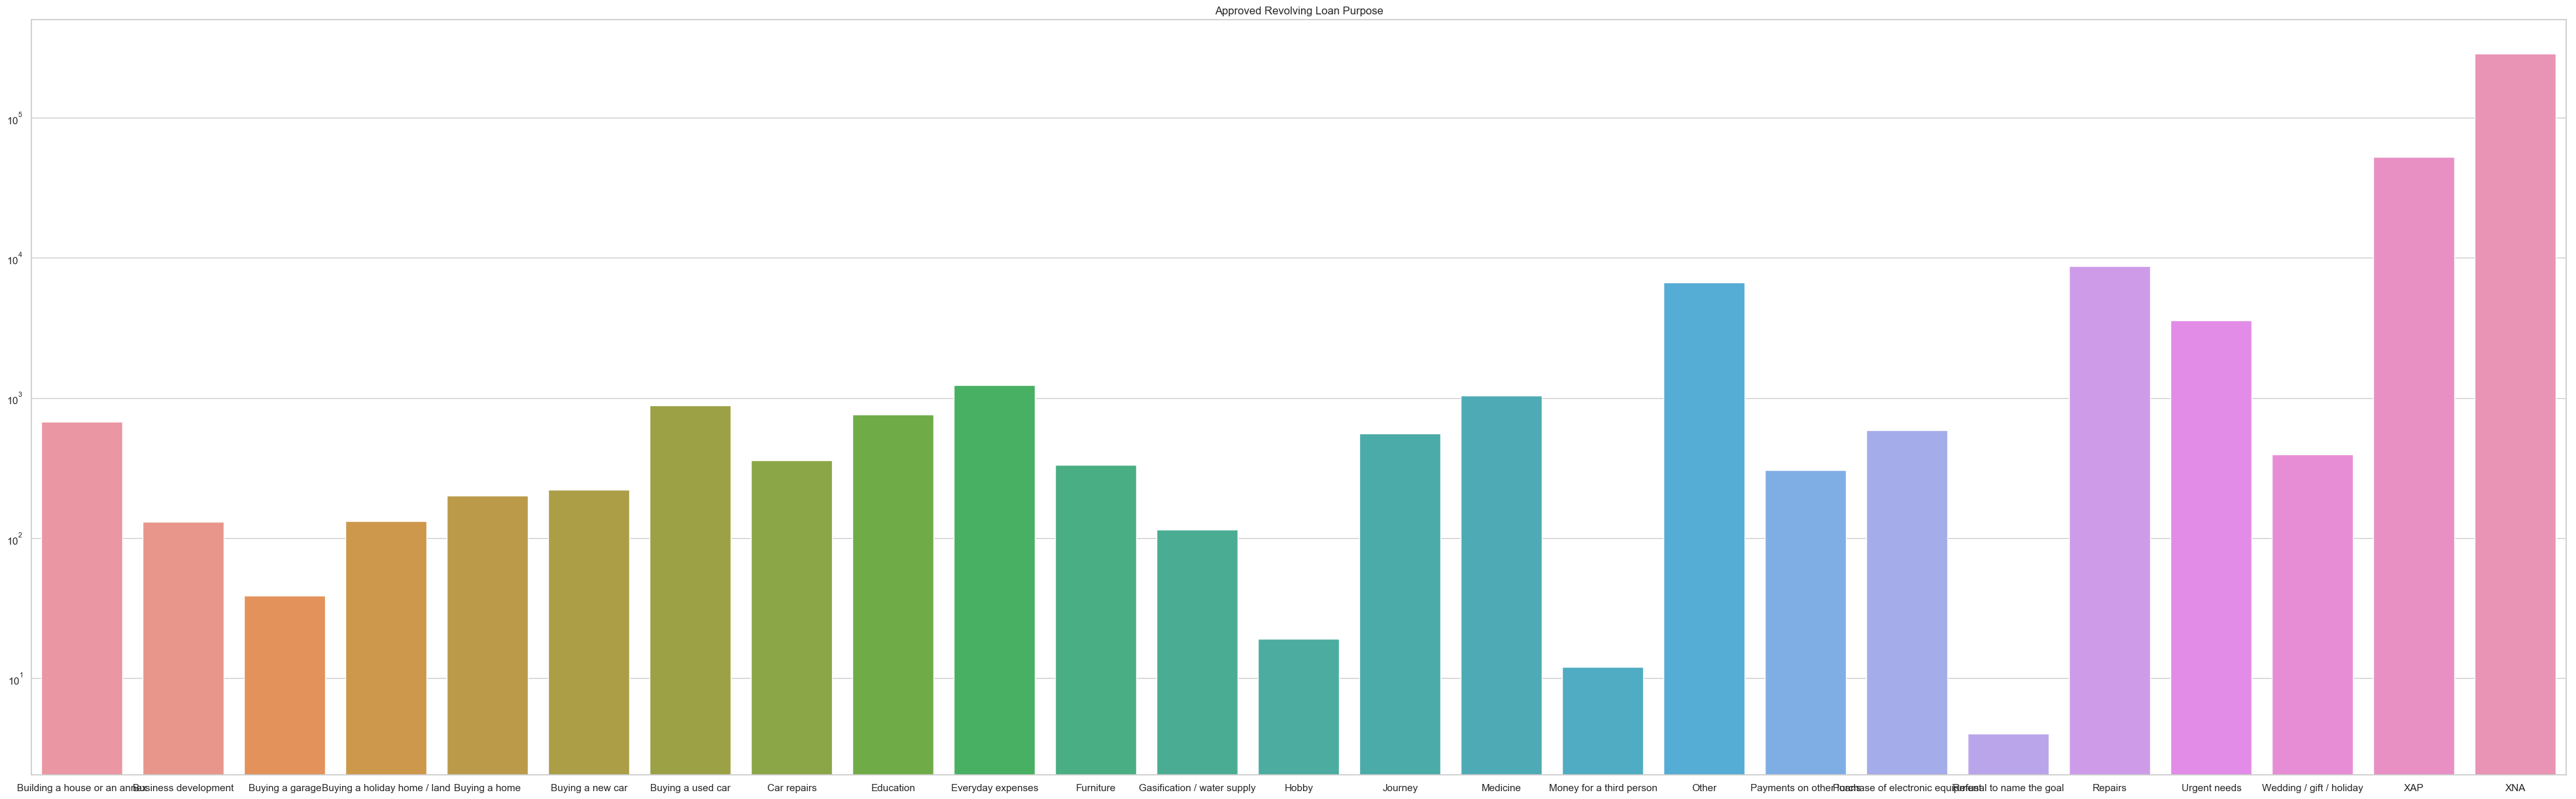

In [103]:


x = ["Building a house or an annex","Business development","Buying a garage","Buying a holiday home / land","Buying a home","Buying a new car","Buying a used car","Car repairs","Education","Everyday expenses","Furniture","Gasification / water supply","Hobby","Journey","Medicine","Money for a third person","Other","Payments on other loans","Purchase of electronic equipment","Refusal to name the goal","Repairs","Urgent needs","Wedding / gift / holiday","XAP","XNA"]
y = [675,130,39,132,200,221,881,358,765,1236,333,115,19,559,1037,12,6677,304,588,4,8677,3574,397,52467,285607]

plt.figure(figsize=(50,15))
plt.title('Approved Revolving Loan Purpose')
plt.yscale('log')
sns.set(style="whitegrid")
bplot=sns.barplot(x,y)

plt.show()

Refused rev loans - NAME_CASH_LOAN_PURPOSE

Tells us about the distribution of loan purpose categories of revolving loans that were refused

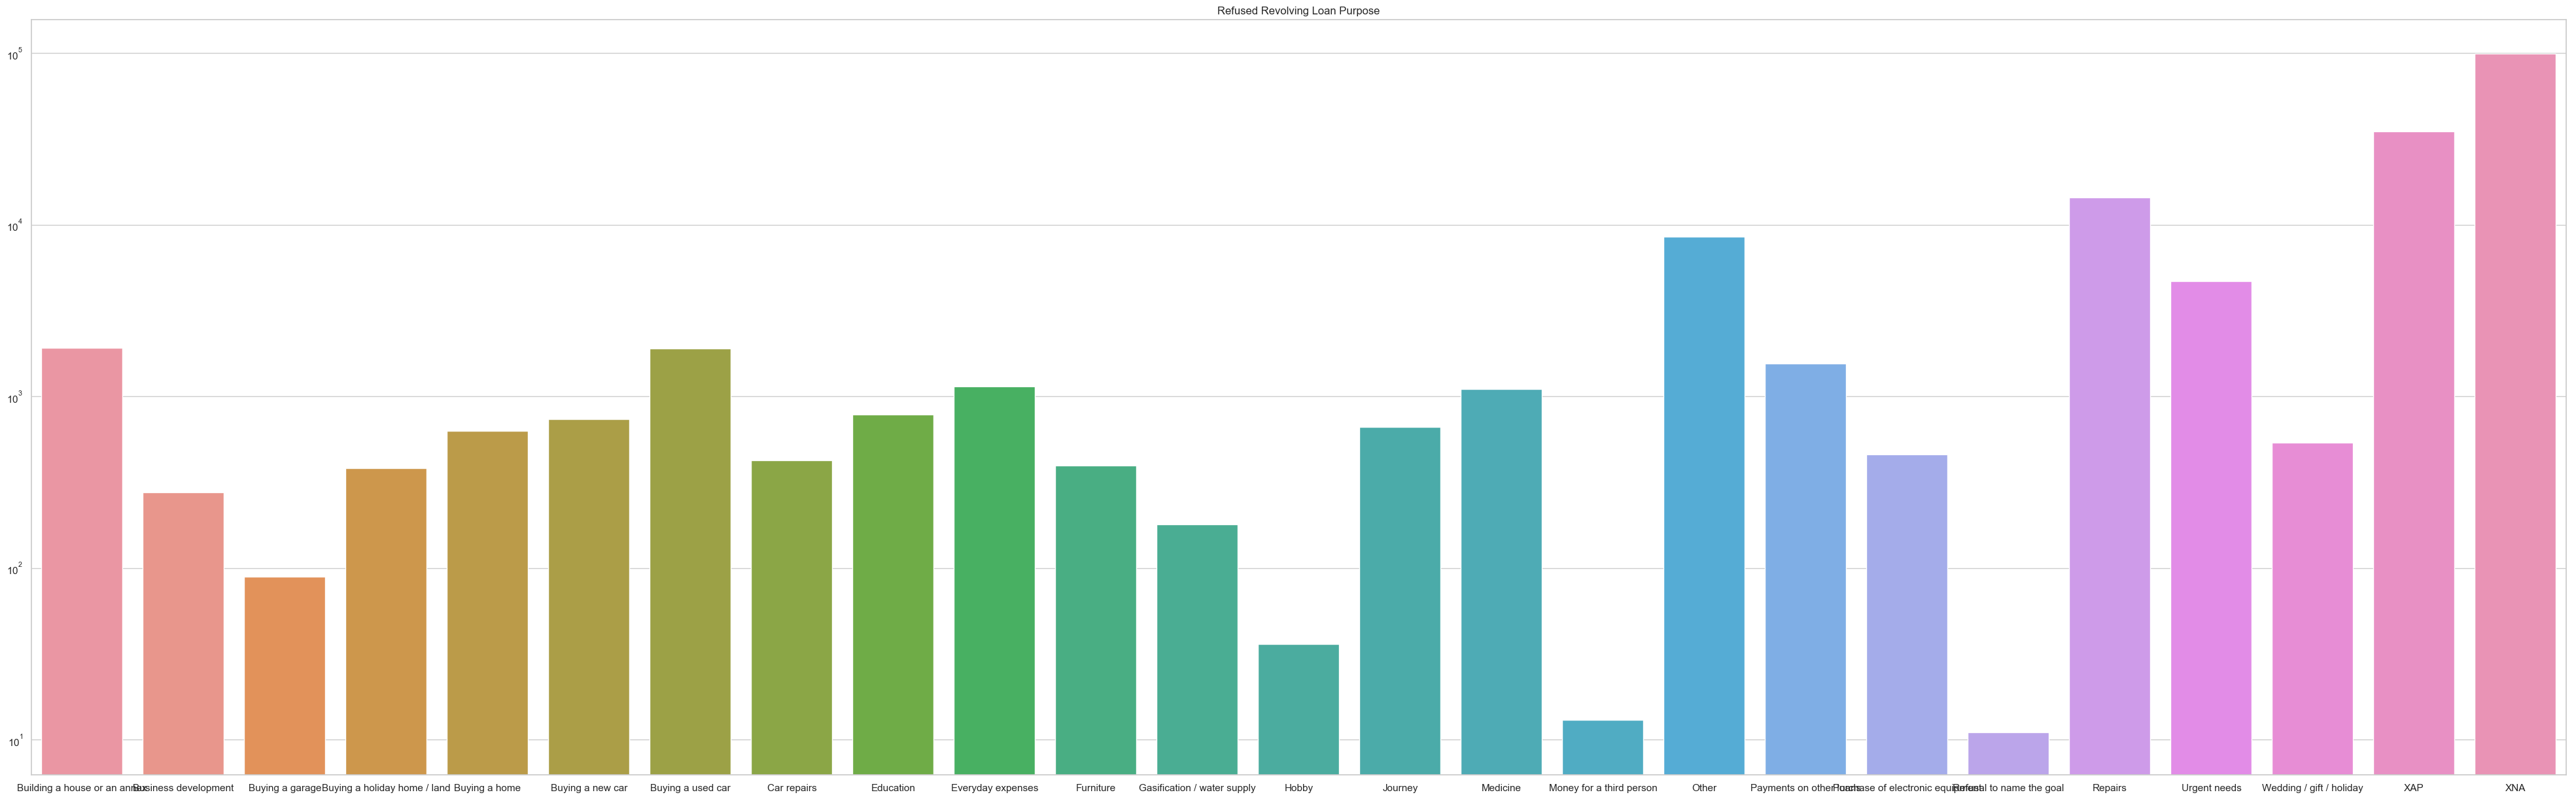

In [104]:


x = ["Building a house or an annex","Business development","Buying a garage","Buying a holiday home / land","Buying a home","Buying a new car","Buying a used car","Car repairs","Education","Everyday expenses","Furniture","Gasification / water supply","Hobby","Journey","Medicine","Money for a third person","Other","Payments on other loans","Purchase of electronic equipment","Refusal to name the goal","Repairs","Urgent needs","Wedding / gift / holiday","XAP","XNA"]
y = [1920,276,89,382,626,735,1893,422,782,1146,396,179,36,660,1099,13,8511,1551,459,11,14402,4682,537,34856,98872]

plt.figure(figsize=(50,15))
plt.title('Refused Revolving Loan Purpose')
plt.yscale('log')
sns.set(style="whitegrid")
bplot=sns.barplot(x,y)

plt.show()